In [20]:
data

,Member,Party,Constituency,Mr Baron's motion B (No deal),Nick Boles's motion D (Common market 2.0),George Eustice's motion H (EFTA and EEA),Mr Clarke's motion J (Customs union),Jeremy Corbyn's motion K (Labour's alternative plan),Joanna Cherry's motion L (Revocation to avoid no deal),Margaret Beckett's motion M (Confirmatory public vote),Mr Fysh's motion O (Contingent preferential arrangements)
0,Afriyie Adam,Conservative,Windsor,1,-1,-1,-1,-1,-1,-1,1
1,Amess Sir David,Conservative,Southend West,1,-1,-1,-1,-1,-1,-1,1
2,Andrew Stuart,Conservative,Pudsey,1,-1,-1,-1,-1,-1,-1,1
3,Bacon Mr Richard,Conservative,South Norfolk,1,-1,-1,-1,-1,-1,-1,1
4,Baker Mr Steve,Conservative,Wycombe,1,-1,-1,-1,-1,-1,-1,1
5,Baron Mr John,Conservative,Basildon and Billericay,1,-1,-1,-1,-1,-1,-1,0
6,Bellingham Sir Henry,Conservative,North West Norfolk,1,-1,-1,-1,-1,-1,-1,1
7,Berry Jake,Conservative,Rossendale and Darwen,1,-1,-1,-1,-1,-1,-1,-1
8,Blackman Bob,Conservative,Harrow East,1,-1,1,-1,-1,-1,-1,1
9,Blunt Crispin,Conservative,Reigate,1,-1,-1,-1,-1,-1,-1,1


In [1]:
plot

NameError: name 'plot' is not defined

In [2]:
d

NameError: name 'd' is not defined

Crawling votes on division Mr Baron's motion B (No deal)
Crawling votes on division Nick Boles's motion D (Common market 2.0)
Crawling votes on division George Eustice's motion H (EFTA and EEA)
Crawling votes on division Mr Clarke's motion J (Customs union)
Crawling votes on division Jeremy Corbyn's motion K (Labour's alternative plan)
Crawling votes on division Joanna Cherry's motion L (Revocation to avoid no deal)
Crawling votes on division Margaret Beckett's motion M (Confirmatory public vote)
Crawling votes on division Mr Fysh's motion O (Contingent preferential arrangements)
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 648 samples in 0.001s...
[t-SNE] Computed neighbors for 648 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 648 / 648
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.640842
[t-SNE] KL divergence after 500 iterations: 0.213670


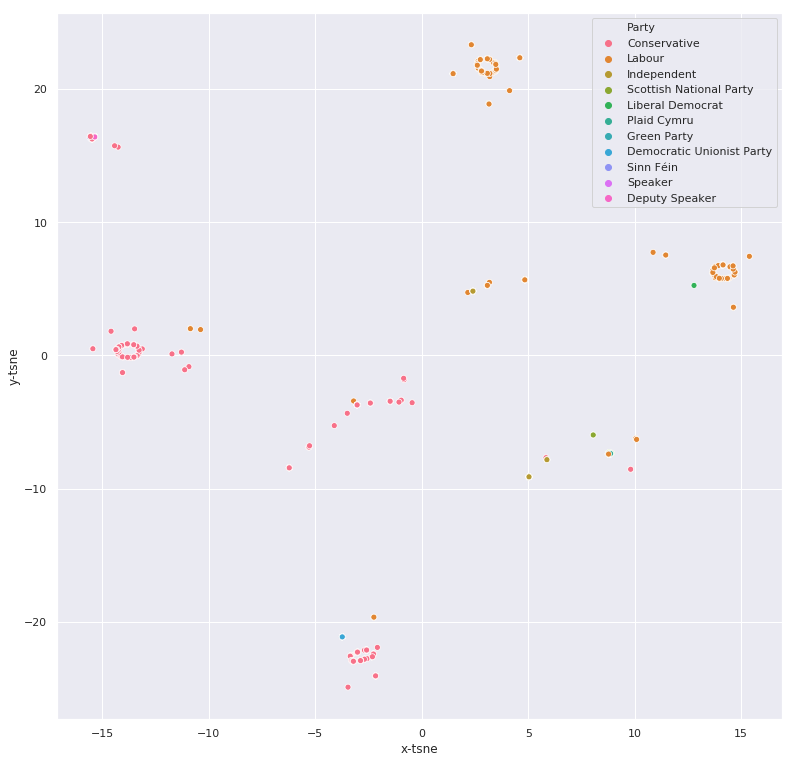

In [11]:
import requests
from pyquery import PyQuery as pq
import numpy as np
from member import Member as Member
from sklearn.cluster import KMeans
import sklearn
import pandas as pd
from functools import reduce
import jupyter
from sklearn.manifold import TSNE
import seaborn as sns


def start():
	dict = {}
	
	divisionNameList = []
	divisionList = [655,656,657,658,659,660,661,662]
	voteType = ['ayes', 'noes', 'notrecorded']
    
	#data = [read_division(i) for i in range(655, 662+1)]
	#data = reduce(lambda x,y: x.join(y), data)
	#data.reset_index(inplace=True)
	#print(data)
	#data.head()
	#data
	#print(data.head())

	#print(dict)
	#dfObj = pd.DataFrame(dict) 
	#print(votes_data)
	#pandas data frame 
	#df = pd.DataFrame(data=votes_data)
	#df = pd.DataFrame.from_dict(dict, orient='index')
	#df = df.transpose()
	#df = reduce(lambda x,y: x.join(y), df)
	#df.reset_index(inplace=True)
	#print(df)
	#df.head()
	#df
    
def read_division(d):

			memberNameList = []
			partyList = []
			constituencyList = []
			voteList = []
			lists = []
			dom = goToPage('https://commonsvotes.digiminster.com/Divisions/Details/'+str(d))
			#activeTab = dom('.tab-pane active')
			#elements = pq(activeTab).children('.header') #care are tab-pane active !! si dupa ce aflu doar elementele astea, trb sa aflu care e ID ul ayesList sau noesList sau pzdm
			elements = dom('.details-card-inner')
			#print(len(elements))
			#trebuie sa iau si numele la division -- trebuie sa iau first header din pag si sa caut children cu .title
			divisionName = pq(dom('.title')[0]).text()
			print('Crawling votes on division '+divisionName)
			#print(divisionName)
			for item in elements:
				member_name = pq(item).children('.header').children('.title').text().replace(",", "")
				member_constituency = pq(item).children('.header').children('.constituency').text()
				member_party = pq(item).children('.header').children('.party').text()
				vote = pq(item).parents('.tab-pane').attr('id')
				if vote == 'ayesList':
					vote = 1
				elif vote == 'noesList':
					vote = -1
				elif vote == 'notrecordedList': 
					vote = 0
				#member = Member(member_name, member_constituency, member_party, member_vote)
				memberNameList.append(member_name)
				partyList.append(member_party)
				constituencyList.append(member_constituency)
				voteList.append(vote)
			#print(members)
			#de aici panda cu dataframe
			lists = [memberNameList, partyList, constituencyList, voteList]
			votes_data = pd.DataFrame(lists, index = ['Member' , 'Party', 'Constituency', 'Vote'])
			#votes_data = pd.DataFrame(lists)
			votes_data = votes_data.transpose()
			#votes_data = votes_data.fillna(0)
			votes_data.rename(columns={'Vote':divisionName}, inplace=True)
			votes_data.set_index(['Member', 'Party', 'Constituency'], inplace=True)
			return votes_data

def goToPage(url):
    response = requests.get(url)
    html = response.text
    dom = pq(html)
    return dom
    
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data = [read_division(i) for i in range(655, 662+1)]
data = reduce(lambda x,y: x.join(y), data)
data.reset_index()
data.head()
data

#print(data)
#np.isfinite(data).all()
#np.any(np.isnan(data))
d = clean_dataset(data)
feat_cols = d.columns[3: ]
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 25, n_iter = 500)
tsne_results = tsne.fit_transform(d.loc[: , feat_cols].values)
data_tsne = d.copy()
data_tsne['x-tsne'] = tsne_results[: , 0]
data_tsne['y-tsne'] = tsne_results[: , 1]
sns.set(rc = {'figure.figsize': (13, 13)})
data_tsne.reset_index(inplace=True)
#print(d)
#print(sns.scatterplot(data = data_tsne, x = 'x-tsne', y = 'y-tsne',  hue = 'Party'))
plot = sns.scatterplot(data = data_tsne, x = 'x-tsne', y = 'y-tsne',  hue = 'Party')

if __name__ == '__main__':
	start()
	del start 

In [12]:
plot

Crawling votes on division Mr Baron's motion B (No deal)
Crawling votes on division Nick Boles's motion D (Common market 2.0)
Crawling votes on division George Eustice's motion H (EFTA and EEA)
Crawling votes on division Mr Clarke's motion J (Customs union)
Crawling votes on division Jeremy Corbyn's motion K (Labour's alternative plan)
Crawling votes on division Joanna Cherry's motion L (Revocation to avoid no deal)
Crawling votes on division Margaret Beckett's motion M (Confirmatory public vote)
Crawling votes on division Mr Fysh's motion O (Contingent preferential arrangements)
[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 648 samples in 0.001s...
[t-SNE] Computed neighbors for 648 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 648 / 648
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.042423
[t-SNE] KL divergence after 500 iterations: 0.209480
Cluster 0 Members
['Afriyie Adam' 'Amess Sir David

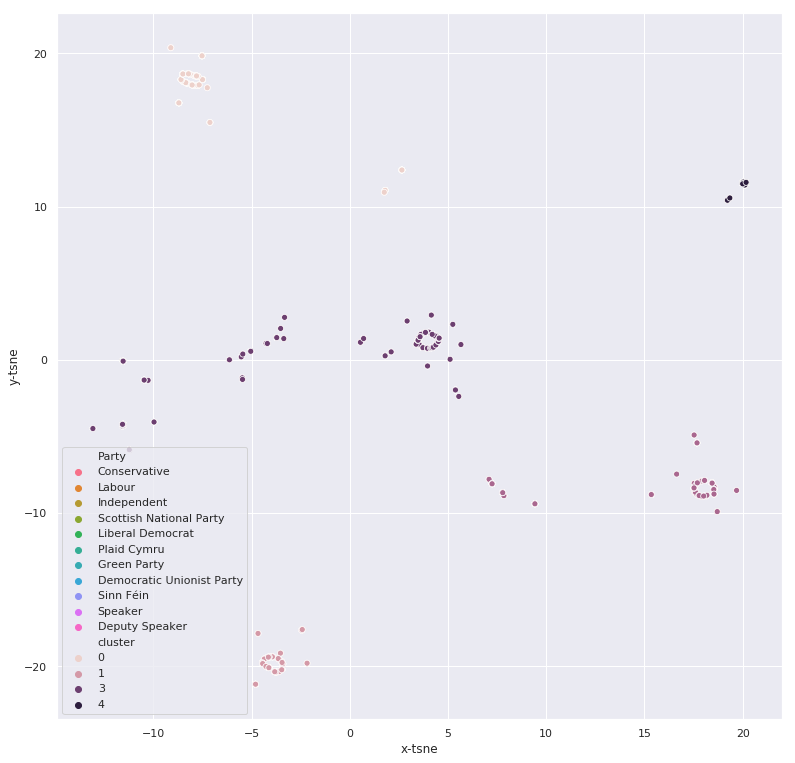

In [26]:
import requests
from pyquery import PyQuery as pq
import numpy as np
from member import Member as Member
from sklearn.cluster import KMeans
import sklearn
import pandas as pd
from functools import reduce
import jupyter
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


def start():
	dict = {}
	
	divisionNameList = []
	divisionList = [655,656,657,658,659,660,661,662]
	voteType = ['ayes', 'noes', 'notrecorded']
    
	#data = [read_division(i) for i in range(655, 662+1)]
	#data = reduce(lambda x,y: x.join(y), data)
	#data.reset_index(inplace=True)
	#print(data)
	#data.head()
	#data
	#print(data.head())

	#print(dict)
	#dfObj = pd.DataFrame(dict) 
	#print(votes_data)
	#pandas data frame 
	#df = pd.DataFrame(data=votes_data)
	#df = pd.DataFrame.from_dict(dict, orient='index')
	#df = df.transpose()
	#df = reduce(lambda x,y: x.join(y), df)
	#df.reset_index(inplace=True)
	#print(df)
	#df.head()
	#df
    
def read_division(d):
			memberNameList = []
			partyList = []
			constituencyList = []
			voteList = []
			lists = []
			dom = goToPage('https://commonsvotes.digiminster.com/Divisions/Details/'+str(d))
			#activeTab = dom('.tab-pane active')
			#elements = pq(activeTab).children('.header') #care are tab-pane active !! si dupa ce aflu doar elementele astea, trb sa aflu care e ID ul ayesList sau noesList sau pzdm
			elements = dom('.details-card-inner')
			#print(len(elements))
			#trebuie sa iau si numele la division -- trebuie sa iau first header din pag si sa caut children cu .title
			divisionName = pq(dom('.title')[0]).text()
			print('Crawling votes on division '+divisionName)
			#print(divisionName)
			for item in elements:
				member_name = pq(item).children('.header').children('.title').text().replace(",", "")
				member_constituency = pq(item).children('.header').children('.constituency').text()
				member_party = pq(item).children('.header').children('.party').text()
				vote = pq(item).parents('.tab-pane').attr('id')
				if vote == 'ayesList':
					vote = 1
				elif vote == 'noesList':
					vote = -1
				elif vote == 'notrecordedList': 
					vote = 0
				#member = Member(member_name, member_constituency, member_party, member_vote)
				memberNameList.append(member_name)
				partyList.append(member_party)
				constituencyList.append(member_constituency)
				voteList.append(vote)
			#print(members)
			#de aici panda cu dataframe
			lists = [memberNameList, partyList, constituencyList, voteList]
			votes_data = pd.DataFrame(lists, index = ['Member' , 'Party', 'Constituency', 'Vote'])
			#votes_data = pd.DataFrame(lists)
			votes_data = votes_data.transpose()
			#votes_data = votes_data.fillna(0)
			votes_data.rename(columns={'Vote':divisionName}, inplace=True)
			votes_data.set_index(['Member', 'Party', 'Constituency'], inplace=True)
			return votes_data

def goToPage(url):
    response = requests.get(url)
    html = response.text
    dom = pq(html)
    return dom
    
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

data = [read_division(i) for i in range(655, 662+1)]
data = reduce(lambda x,y: x.join(y), data)
data.reset_index()
data.head()
data

#print(data)
#np.isfinite(data).all()
#np.any(np.isnan(data))
d = clean_dataset(data)
feat_cols = d.columns[3: ]
tsne = TSNE(n_components = 2, verbose = 1, perplexity = 25, n_iter = 500)
tsne_results = tsne.fit_transform(d.loc[: , feat_cols].values)
data_tsne = d.copy()
data_tsne['x-tsne'] = tsne_results[: , 0]
data_tsne['y-tsne'] = tsne_results[: , 1]
sns.set(rc = {'figure.figsize': (13, 13)})
data_tsne.reset_index(inplace=True)
plot = sns.scatterplot(data = data_tsne, x = 'x-tsne', y = 'y-tsne', hue = 'Party')

#k means cluster
kmeans = KMeans(n_clusters = 5, random_state = 0).fit(data_tsne.loc[: , ['x-tsne', 'y-tsne']])
data_kmeans = data_tsne.copy()
data_kmeans['cluster'] = kmeans.predict(data_kmeans.loc[: , ['x-tsne', 'y-tsne']])
sns.scatterplot(data = data_kmeans, x = 'x-tsne', y = 'y-tsne', hue = 'cluster')

#plt.show()

print("Cluster 0 Members")
print(data_kmeans[data_kmeans.cluster == 0].Member.values)


if __name__ == '__main__':
	start()
	del start 

In [16]:
data

,,,Mr Baron's motion B (No deal),Nick Boles's motion D (Common market 2.0),George Eustice's motion H (EFTA and EEA),Mr Clarke's motion J (Customs union),Jeremy Corbyn's motion K (Labour's alternative plan),Joanna Cherry's motion L (Revocation to avoid no deal),Margaret Beckett's motion M (Confirmatory public vote),Mr Fysh's motion O (Contingent preferential arrangements)
Member,Party,Constituency,,,,,,,,
Afriyie Adam,Conservative,Windsor,1,-1,-1,-1,-1,-1,-1,1
Amess Sir David,Conservative,Southend West,1,-1,-1,-1,-1,-1,-1,1
Andrew Stuart,Conservative,Pudsey,1,-1,-1,-1,-1,-1,-1,1
Bacon Mr Richard,Conservative,South Norfolk,1,-1,-1,-1,-1,-1,-1,1
Baker Mr Steve,Conservative,Wycombe,1,-1,-1,-1,-1,-1,-1,1
Baron Mr John,Conservative,Basildon and Billericay,1,-1,-1,-1,-1,-1,-1,0
Bellingham Sir Henry,Conservative,North West Norfolk,1,-1,-1,-1,-1,-1,-1,1
Berry Jake,Conservative,Rossendale and Darwen,1,-1,-1,-1,-1,-1,-1,-1
Blackman Bob,Conservative,Harrow East,1,-1,1,-1,-1,-1,-1,1
